
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [1]:

import numpy as np
import matplotlib.pyplot as plt


In [7]:

# Implement StandardScaler manually ,  first read about it, how it works and then implement it 
class StandardScalerManual:
    def fit(self, X):
        X = np.asarray(X)
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)

        # Avoid division by zero for constant features
        self.std_[self.std_ == 0] = 1.0

        return self
    
    def transform(self, X):
        X = np.asarray(X)
        return (X - self.mean_) / self.std_
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


In [ ]:
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda

    def fit(self, X, y):
        X = np.asarray(X)
        y = np.asarray(y).reshape(-1)  

        n, d = X.shape
        self.w = np.zeros(d)
        self.b = 0.0
        self.losses_ = []  

        for _ in range(self.epochs):
            # Forward pass
            y_pred = X @ self.w + self.b
            error = y_pred - y

            # Loss
            mse = np.mean(error ** 2)
            l2_penalty = self.l2_lambda * np.sum(self.w ** 2)
            loss = mse + l2_penalty
            self.losses_.append(loss)

            # Gradients
            dw = (2 / n) * (X.T @ error) + 2 * self.l2_lambda * self.w
            db = (2 / n) * np.sum(error)

            # Update
            self.w -= self.lr * dw
            self.b -= self.lr * db

        return self

    def predict(self, X):
        X = np.asarray(X)
        return X @ self.w + self.b


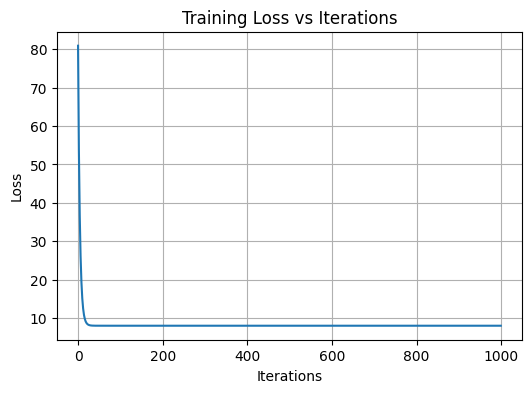

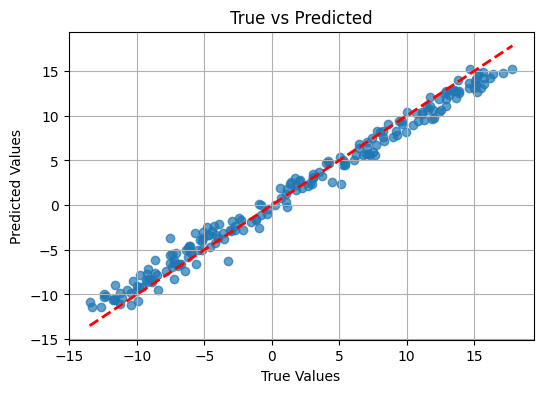

Learned w: [8.001485]
Learned b: 1.5876012653248361


In [ ]:
np.random.seed(42)

# Dataset
n_samples = 200
X = np.random.uniform(-5, 5, size=(n_samples, 1))

w_true = np.array([3.0])
b_true = 2.0
noise = np.random.normal(0, 1.0, size=n_samples)

y = X @ w_true + b_true + noise
y = y.reshape(-1)  

scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)

model = LinearRegressionManual(lr=0.05, epochs=1000, l2_lambda=0.1)
model.fit(X_scaled, y)

y_pred = model.predict(X_scaled) 

plt.figure(figsize=(6, 4))
plt.plot(model.losses_)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Training Loss vs Iterations")
plt.grid(True)
plt.show()


plt.figure(figsize=(6, 4))
plt.scatter(y, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()],
         [y.min(), y.max()],
         'r--', linewidth=2)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted")
plt.grid(True)
plt.show()

print("Learned w:", model.w)
print("Learned b:", model.b)



## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [17]:

#Implement sigmoid function as told in the lectures 
def sigmoid(z):
    z=np.asarray(z)
    return 1 / (1 + np.exp(-z))


In [18]:

#Implement Logistic Regression from scratch and here also add the regularizaation term 
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda

    def fit(self, X, y):
        X = np.asarray(X)
        y = np.asarray(y).reshape(-1)

        n, d = X.shape
        self.w = np.zeros(d)
        self.b = 0.0
        self.losses_ = []

        for _ in range(self.epochs):
            # Forward pass
            z = X @ self.w + self.b
            y_hat = sigmoid(z)

            # Loss (numerically stable)
            loss = -np.mean(
                y * np.log(y_hat + 1e-9) +
                (1 - y) * np.log(1 - y_hat + 1e-9)
            ) + self.l2_lambda * np.sum(self.w ** 2)

            self.losses_.append(loss)

            # Gradients
            error = y_hat - y
            dw = (1 / n) * (X.T @ error) + 2 * self.l2_lambda * self.w
            db = (1 / n) * np.sum(error)

            # Update
            self.w -= self.lr * dw
            self.b -= self.lr * db

        return self

    def predict_proba(self, X):
        X = np.asarray(X)
        z = X @ self.w + self.b
        return sigmoid(z)

    def predict(self, X):
        probs = self.predict_proba(X)
        return (probs >= 0.5).astype(int)



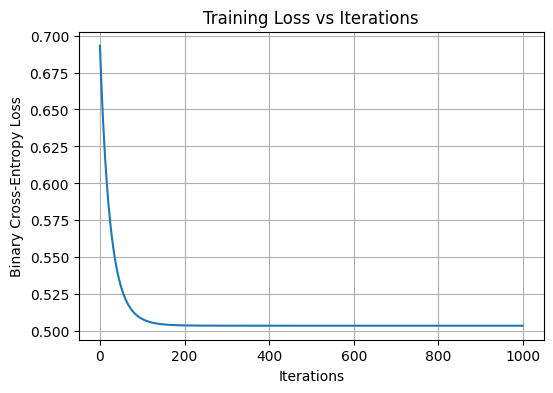

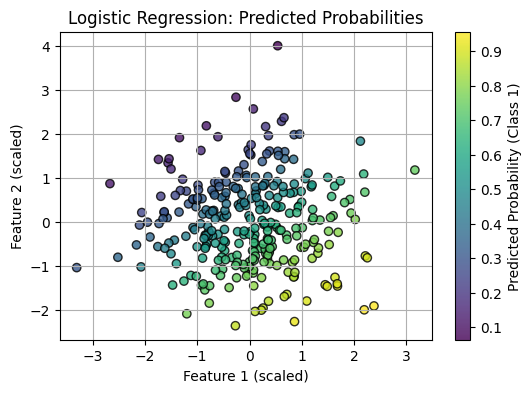

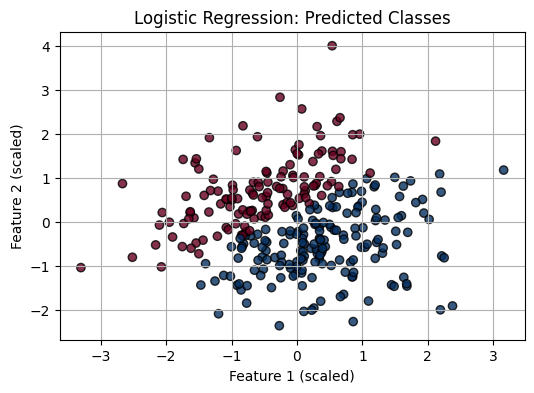

In [22]:
np.random.seed(42)

# Dataset parameters
n_samples = 300
n_features = 2

# Generate features
X = np.random.randn(n_samples, n_features)

# True parameters
w_true = np.array([2.0, -3.0])
b_true = 0.5

# Linear combination + noise
logits = X @ w_true + b_true + 0.5 * np.random.randn(n_samples)

# Binary labels
y = (logits > 0).astype(int)

scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)

model = LogisticRegressionManual(lr=0.05, epochs=1000, l2_lambda=0.1)
model.fit(X_scaled, y)

plt.figure(figsize=(6, 4))
plt.plot(model.losses_)
plt.xlabel("Iterations")
plt.ylabel("Binary Cross-Entropy Loss")
plt.title("Training Loss vs Iterations")
plt.grid(True)
plt.show()

# Predicted probabilities on training data
y_proba = model.predict_proba(X_scaled)

plt.figure(figsize=(6, 4))
plt.scatter(
    X_scaled[:, 0],
    X_scaled[:, 1],
    c=y_proba,
    cmap="viridis",
    edgecolors="k",
    alpha=0.8
)
plt.colorbar(label="Predicted Probability (Class 1)")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.title("Logistic Regression: Predicted Probabilities")
plt.grid(True)
plt.show()

y_pred = model.predict(X_scaled)

plt.figure(figsize=(6, 4))
plt.scatter(
    X_scaled[:, 0],
    X_scaled[:, 1],
    c=y_pred,
    cmap="RdBu",
    edgecolors="k",
    alpha=0.8
)
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.title("Logistic Regression: Predicted Classes")
plt.grid(True)
plt.show()





## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [23]:

# Implement K-Means for matrix elements
#CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT ! 
def kmeans_matrix(M, k, max_iters=100):
    '''
    Returns:
    assignment_table: same shape as M, contains cluster labels
    cookbook: dict -> cluster_id : list of (i, j) positions
    centroids: numpy array of centroid values
    '''
    M = np.asarray(M)
    n, m = M.shape

    # Flatten matrix values
    values = M.flatten()
    N = values.shape[0]

    # Initialize centroids by sampling from values
    rng = np.random.default_rng()
    centroids = rng.choice(values, size=k, replace=False)

    # Cluster assignments (flattened)
    assignments = np.zeros(N, dtype=int)

    for _ in range(max_iters):
        # Assignment step
        distances = np.abs(values[:, None] - centroids[None, :])
        new_assignments = np.argmin(distances, axis=1)

        # Convergence check
        if np.array_equal(assignments, new_assignments):
            break
        assignments = new_assignments

        # Update step
        for c in range(k):
            cluster_values = values[assignments == c]
            if len(cluster_values) > 0:
                centroids[c] = cluster_values.mean()
            # else: keep centroid unchanged (important)

    # Build assignment table
    assignment_table = assignments.reshape(n, m)

    # Build cookbook
    cookbook = {c: [] for c in range(k)}
    for idx, cluster in enumerate(assignments):
        i = idx // m
        j = idx % m
        cookbook[cluster].append((i, j))

    return assignment_table, cookbook, centroids


In [24]:
np.random.seed(42)

M = np.random.randn(4, 5)
k = 3

assignment_table, cookbook, centroids = kmeans_matrix(M, k)

print("M:\n", M)
print("\nAssignment Table:\n", assignment_table)
print("\nCentroids:\n", centroids)
print("\nCookbook:")
for c, pos in cookbook.items():
    print(f"Cluster {c}: {pos}")


M:
 [[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337]
 [-0.23413696  1.57921282  0.76743473 -0.46947439  0.54256004]
 [-0.46341769 -0.46572975  0.24196227 -1.91328024 -1.72491783]
 [-0.56228753 -1.01283112  0.31424733 -0.90802408 -1.4123037 ]]

Assignment Table:
 [[1 0 1 1 0]
 [0 1 1 0 1]
 [0 0 0 2 2]
 [0 2 0 2 2]]

Centroids:
 [-0.22347271  0.92610669 -1.39427139]

Cookbook:
Cluster 0: [(0, 1), (0, 4), (1, 0), (1, 3), (2, 0), (2, 1), (2, 2), (3, 0), (3, 2)]
Cluster 1: [(0, 0), (0, 2), (0, 3), (1, 1), (1, 2), (1, 4)]
Cluster 2: [(2, 3), (2, 4), (3, 1), (3, 3), (3, 4)]



## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
